# Análisis Exploratorio de Datos 

## Parte 1 - Correlaciones

El primer paso para este proyecto es el de elegir las monedas adecuadas. Como criterio de selección, voy a elegir monedas con una correlación menor a 0.8, dándole prioridad a las monedas con mayor volumen. El principal fundamento para esta decisión es un principio financiero que, en pos de minimizar riesgos, busca diversificar la cartera de los inversores en distintos activos financieros. Uno de los métodos de diversificación es, justamente, que los activos no tengan un índice alto de correlación entre ellos.

En este archivo se extraerán valores históricos de las 50 monedas con mayor volumen de venta de la plataforma de CoinGecko. Luego, se aplicarán gráficos de correlación en 5 tandas de 10 criptomonedas cada una, de las cuales se descartarán las que no resultan de interés. Por último, se visualizará un gráfico de correlación a todas las criptomonedas seleccionadas, para descartar correlaciones entre criptomonedas de distintas tandas. Al final, terminarán siendo 10 en total.

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import time
import re

In [178]:
# Se crea un array con la informacion de las 30 criptomonedas con mayor volumen.
data = requests.get('https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&per_page=50&page=1&sparkline=false&locale=en')
top_50_cryptos = json.loads(data.content)

In [179]:
# Se extraen unicamente los ids, que seran necesarios para las requests a la API.
cryptos_id = [crypto['id'] for crypto in top_50_cryptos]

In [180]:
cryptos_ohlc = []
registros_totales = 50
queries_por_minuto = 14
tiempo_de_espera = 60 / queries_por_minuto

for crypto_id in cryptos_id:
    crypto = json.loads(requests.get(f'https://api.coingecko.com/api/v3/coins/{crypto_id}/ohlc?vs_currency=usd&days=max').content)
    cryptos_ohlc.append(crypto)
    time.sleep(tiempo_de_espera)

In [181]:
data_frames = [[]]

for i, arr in enumerate(cryptos_ohlc):
    df = pd.DataFrame(arr, columns=['timestamp', 'open', 'high', 'low', f'close_{cryptos_id[i]}'])
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('date', inplace=True)
    df.drop(columns=['timestamp', 'open', 'high', 'low'], inplace=True)

    if len(data_frames[len(data_frames) - 1]) < 10:
        data_frames[len(data_frames) - 1].append(df)
    else:
        data_frames.append([df])


In [182]:
def crear_df(n_tanda):
    return pd.concat(data_frames[n_tanda], axis=1).dropna()

df_1 = crear_df(0)
df_2 = crear_df(1)
df_3 = crear_df(2)
df_4 = crear_df(3)
df_5 = crear_df(4)

In [ ]:
def graficar(nombre, matriz):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matriz, annot=True, cmap='coolwarm')
    plt.title(nombre)
    plt.show()

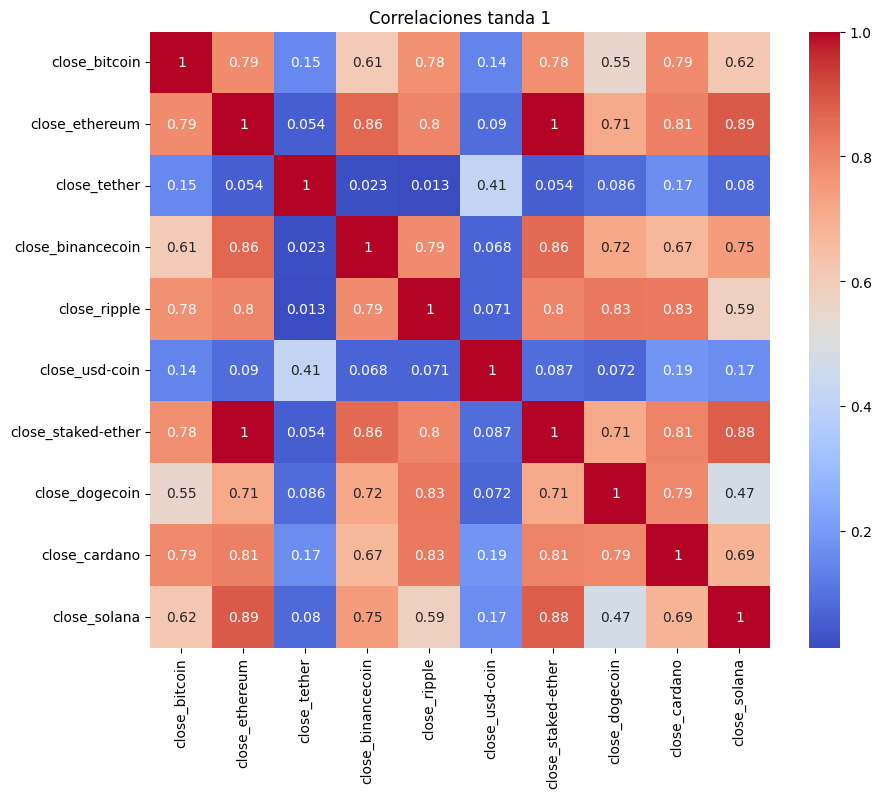

In [205]:
matriz_corr_1 = df_1.corr()
graficar('Correlaciones tanda 1', matriz_corr_1)

In [158]:
tanda_1 = ['bitcoin', 'ethereum', 'dogecoin']
tandas_indices = {0: [0, 1, 7]}

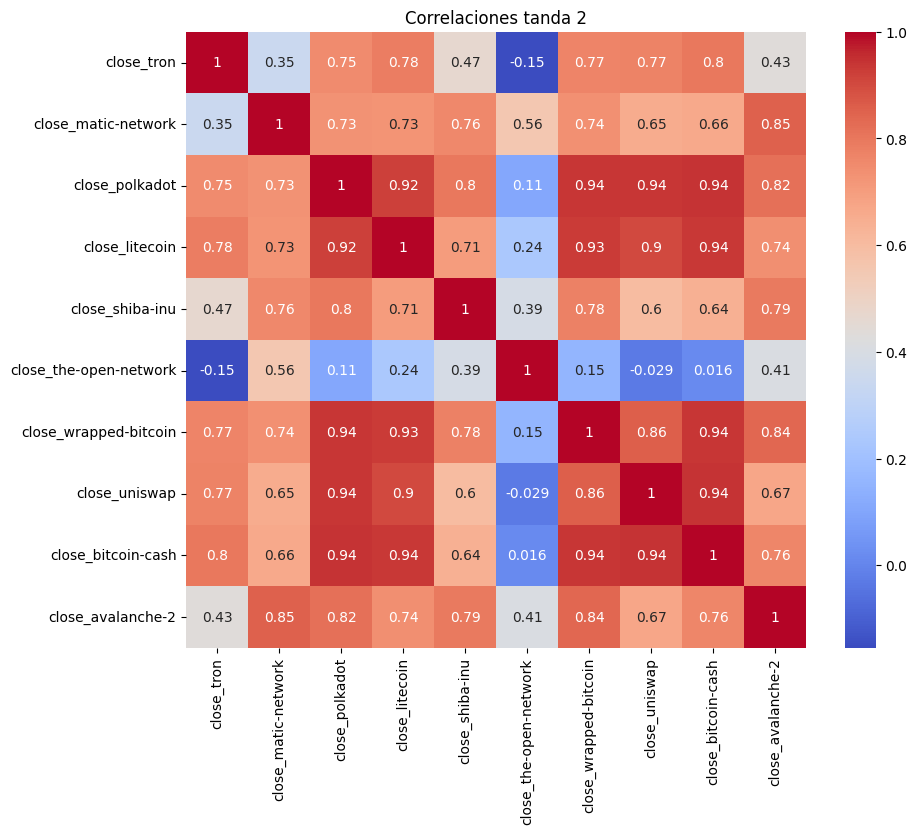

In [206]:
matriz_corr_2 = df_2.corr()
graficar('Correlaciones tanda 2', matriz_corr_2)

In [159]:
tanda_2 = ['tron', 'matic-network', 'polkadot', 'the-open-network']
tandas_indices[1] =  [0,1,2,5]

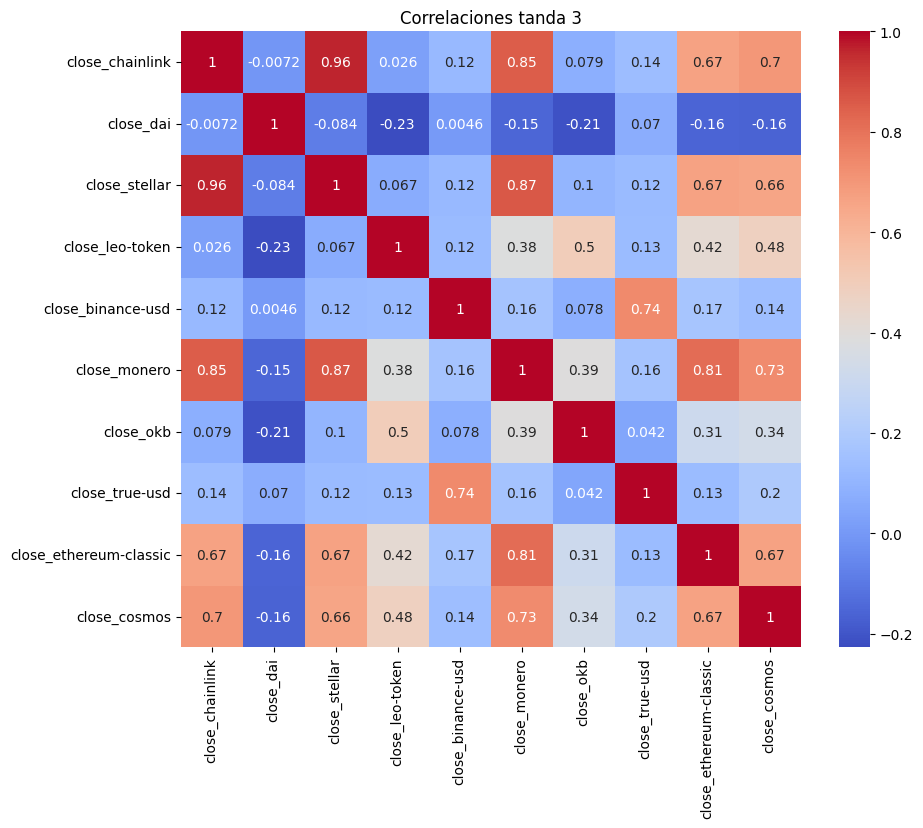

In [207]:
matriz_corr_3 = df_3.corr()
graficar('Correlaciones tanda 3', matriz_corr_3)

In [160]:
tanda_3 = ['chainlink', 'leo-token', 'okb', 'cosmos']
tandas_indices[2] = [0, 3, 6, 9]

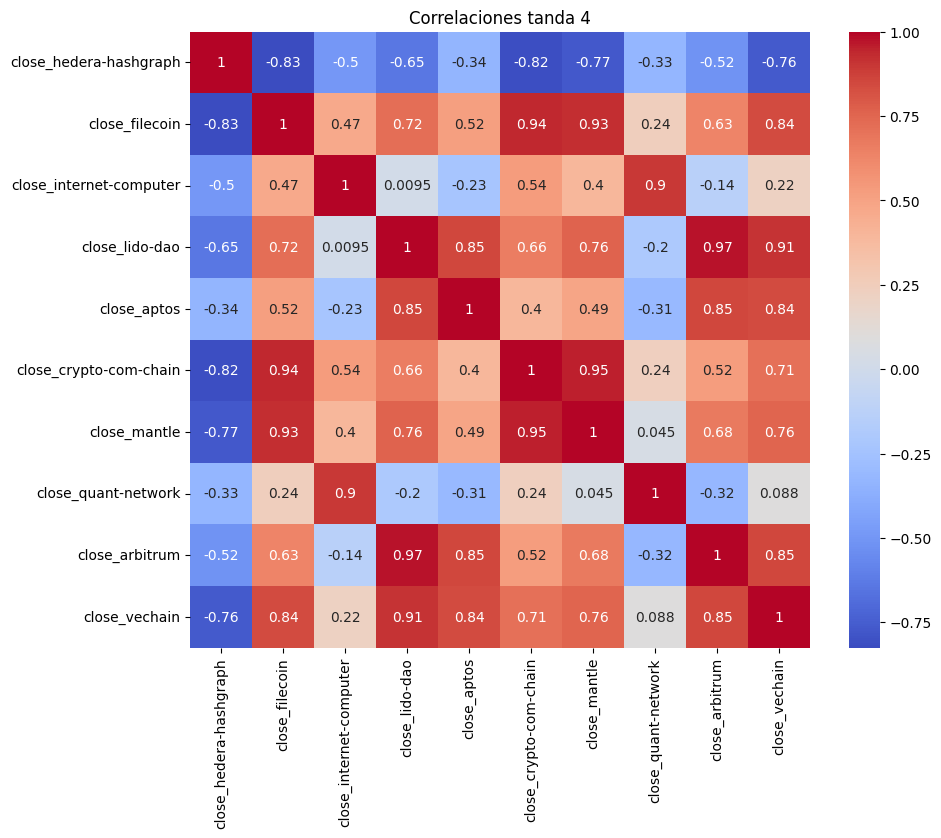

In [208]:
matriz_corr_4 = df_4.corr()
graficar('Correlaciones tanda 4', matriz_corr_4)

In [187]:
tanda_4 = ['hedera-hashgraph', 'internet-computer', 'crypto-com-chain', 'vechain']
tandas_indices[3] = [0,2,5,9]

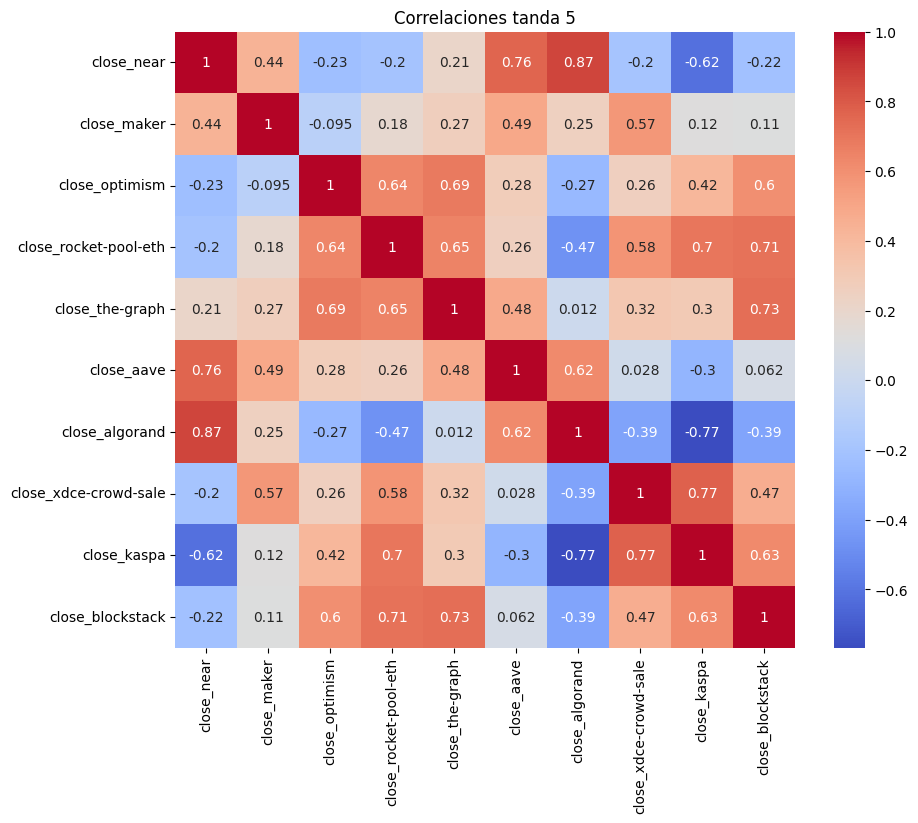

In [209]:
matriz_corr_5 = df_5.corr()
graficar('Correlaciones tanda 5', matriz_corr_5)

In [188]:
tanda_5 = ['near', 'maker', 'optimism', 'rocket-pool-eth', 'the-graph', 'aave', 'xdce-crowd-sale', 'kaspa', 'blockstack']
tandas_indices[4] = [0,1,2,3,4,5,7,8,9]

In [189]:
cryptos_final = np.concatenate((tanda_1, tanda_2, tanda_3, tanda_4, tanda_5))
cryptos_final

array(['bitcoin', 'ethereum', 'dogecoin', 'tron', 'matic-network',
       'polkadot', 'the-open-network', 'chainlink', 'leo-token', 'okb',
       'cosmos', 'hedera-hashgraph', 'internet-computer',
       'crypto-com-chain', 'vechain', 'near', 'maker', 'optimism',
       'rocket-pool-eth', 'the-graph', 'aave', 'xdce-crowd-sale', 'kaspa',
       'blockstack'], dtype='<U17')

In [284]:
last_corr = []
for tanda in tandas_indices:
    for value in tandas_indices[tanda]:
        last_corr.append(data_frames[tanda][value])

In [285]:
len(last_corr)

24

In [286]:
last_corr_1 = last_corr[:12]
last_corr_2 = last_corr[12:]

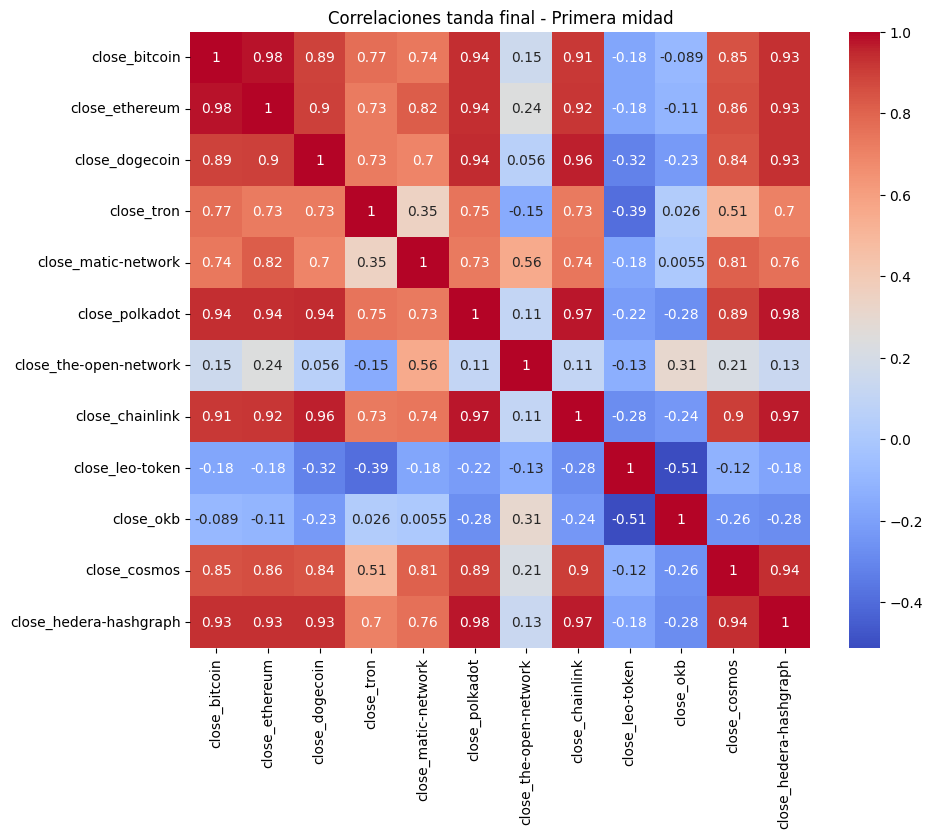

In [210]:
corr = pd.concat(last_corr_1, axis=1).dropna().corr()
graficar('Correlaciones tanda final - Primera midad', corr)

In [217]:
indices_finales_1_mitad = [1,3,6,8,9]

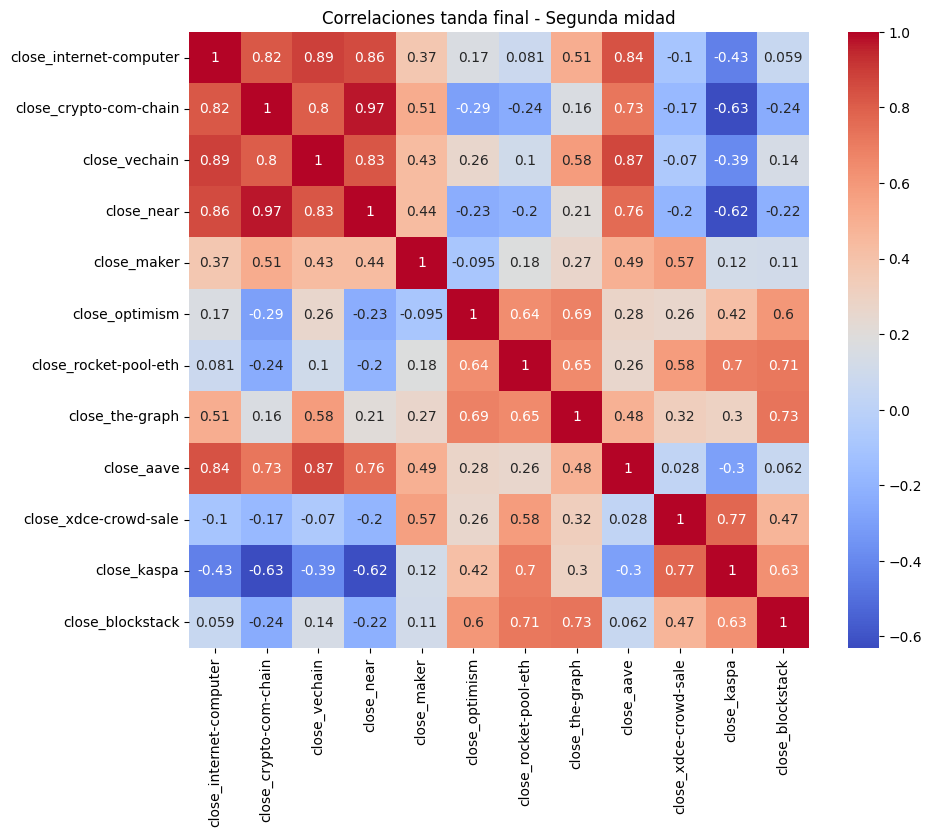

In [211]:
corr = pd.concat(last_corr_2, axis=1).dropna().corr()
graficar('Correlaciones tanda final - Segunda midad', corr)

In [293]:
indices_finales_2_mitad = [0,4,5,6,7,9,10]
indices_finales_2_mitad = [n + len(last_corr_1) for n in indices_finales_2_mitad]

In [294]:
indices_finales = np.concatenate((indices_finales_1_mitad, indices_finales_2_mitad))
indices_finales

array([ 1,  3,  6,  8,  9, 12, 16, 17, 18, 19, 21, 22])

In [295]:
dfs_finales = [df for i, df in enumerate(last_corr) if i in indices_finales]

In [296]:
df_final = pd.concat(dfs_finales, axis=1)

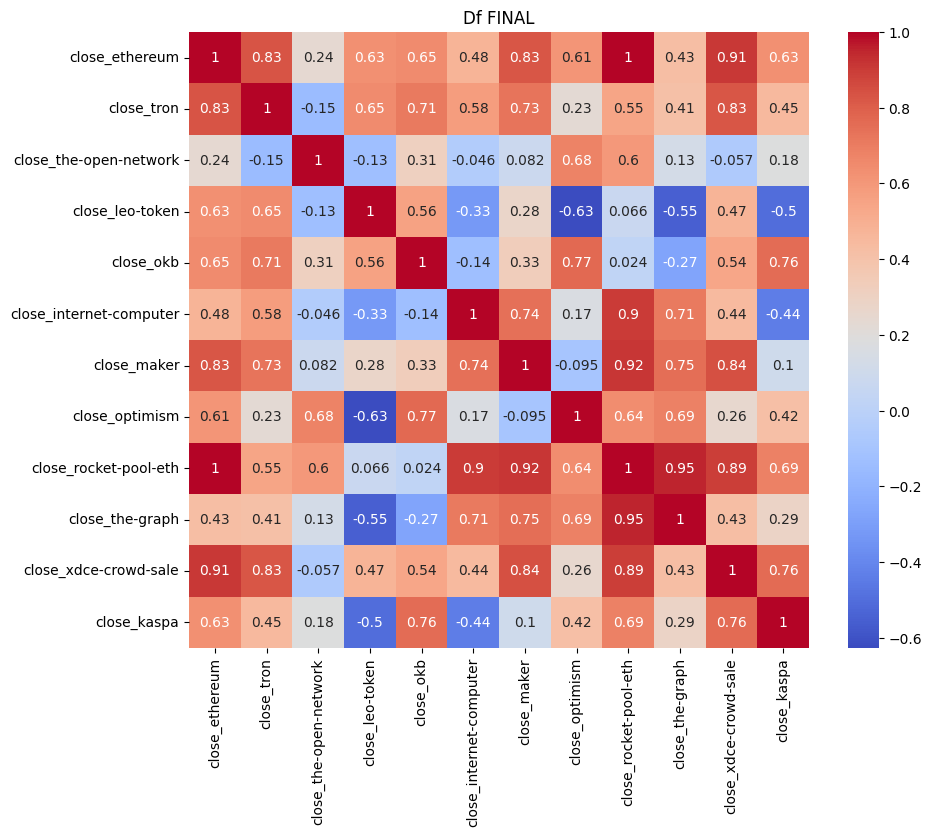

In [297]:
graficar('Df FINAL', df_final.corr())

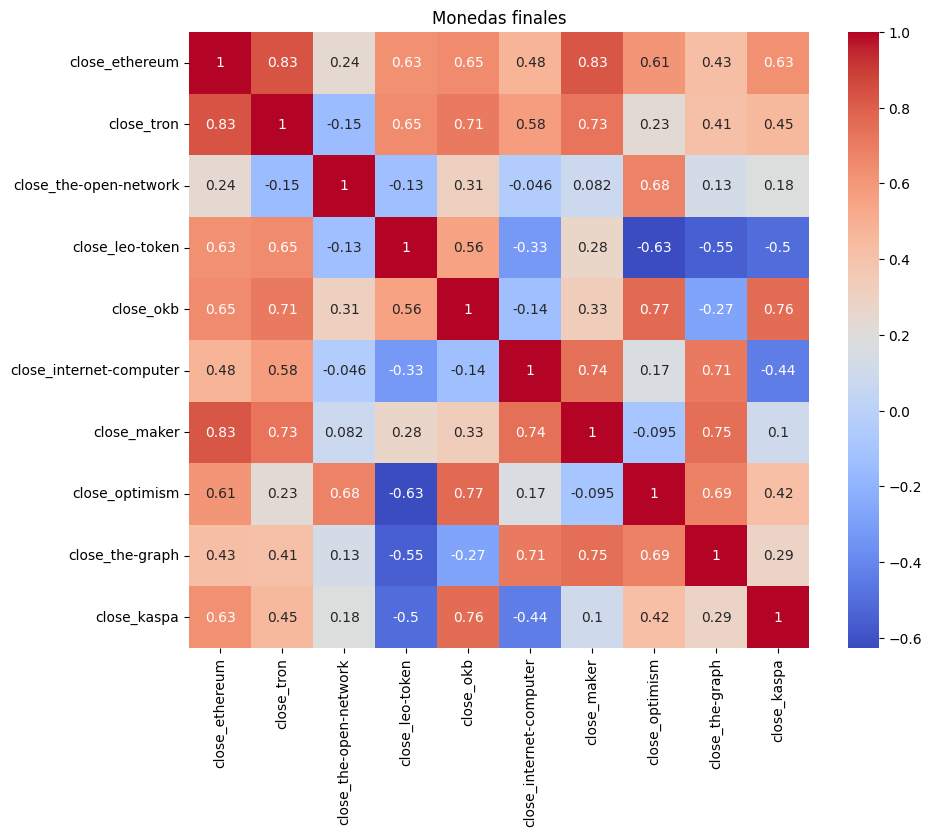

In [320]:
df_final = df_final.drop(columns=['close_rocket-pool-eth', 'close_xdce-crowd-sale'])
graficar('Monedas finales', df_final.corr())

In [334]:
nombres = [column[6:] for column in df_final]
nombres

['ethereum',
 'tron',
 'the-open-network',
 'leo-token',
 'okb',
 'internet-computer',
 'maker',
 'optimism',
 'the-graph',
 'kaspa']